In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
import glob

# Data Extraction

In [96]:
glob.glob(r'C:\Users\Ikenna George\Backup\Documents\DATA SCIENCE & PROGRAMMING\DATA ANALYTICS PROJECTS\Project 2; Time Series Project\individual_stocks_5yr\*csv')

['C:\\Users\\Ikenna George\\Backup\\Documents\\DATA SCIENCE & PROGRAMMING\\DATA ANALYTICS PROJECTS\\Project 2; Time Series Project\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\Ikenna George\\Backup\\Documents\\DATA SCIENCE & PROGRAMMING\\DATA ANALYTICS PROJECTS\\Project 2; Time Series Project\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\Ikenna George\\Backup\\Documents\\DATA SCIENCE & PROGRAMMING\\DATA ANALYTICS PROJECTS\\Project 2; Time Series Project\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\Ikenna George\\Backup\\Documents\\DATA SCIENCE & PROGRAMMING\\DATA ANALYTICS PROJECTS\\Project 2; Time Series Project\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\Ikenna George\\Backup\\Documents\\DATA SCIENCE & PROGRAMMING\\DATA ANALYTICS PROJECTS\\Project 2; Time Series Project\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\Ikenna George\\Backup\\Documents\\DATA SCIENCE & PROGRAMMING\\DATA ANALYTICS PROJECTS\\Project 2; Time Series Project\\individual_stock

In [97]:
len(glob.glob(r'C:\Users\Ikenna George\Backup\Documents\DATA SCIENCE & PROGRAMMING\DATA ANALYTICS PROJECTS\Project 2; Time Series Project\individual_stocks_5yr\*csv'))

505

In [98]:
company_list = [
     r'C:\\Users\\Ikenna George\\Backup\\Documents\\DATA SCIENCE & PROGRAMMING\\DATA ANALYTICS PROJECTS\\Project 2; Time Series Project\\individual_stocks_5yr\\AAPL_data.csv',
     r'C:\\Users\\Ikenna George\\Backup\\Documents\\DATA SCIENCE & PROGRAMMING\\DATA ANALYTICS PROJECTS\\Project 2; Time Series Project\\individual_stocks_5yr\\AMZN_data.csv',
     r'C:\\Users\\Ikenna George\\Backup\\Documents\\DATA SCIENCE & PROGRAMMING\\DATA ANALYTICS PROJECTS\\Project 2; Time Series Project\\individual_stocks_5yr\\GOOG_data.csv',
     r'C:\\Users\\Ikenna George\\Backup\\Documents\\DATA SCIENCE & PROGRAMMING\\DATA ANALYTICS PROJECTS\\Project 2; Time Series Project\\individual_stocks_5yr\\MSFT_data.csv'

]

In [99]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [100]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    #old method
    #all_data = all_data.append(current_df, ignore_index = True)
    #Modern method
    all_data = pd.concat([all_data, current_df],ignore_index = True)

In [101]:
all_data.shape

(4752, 7)

In [102]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


# Data Transformation

In [103]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

In [104]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [105]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [106]:
tech_list = all_data['Name'].unique()

In [107]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

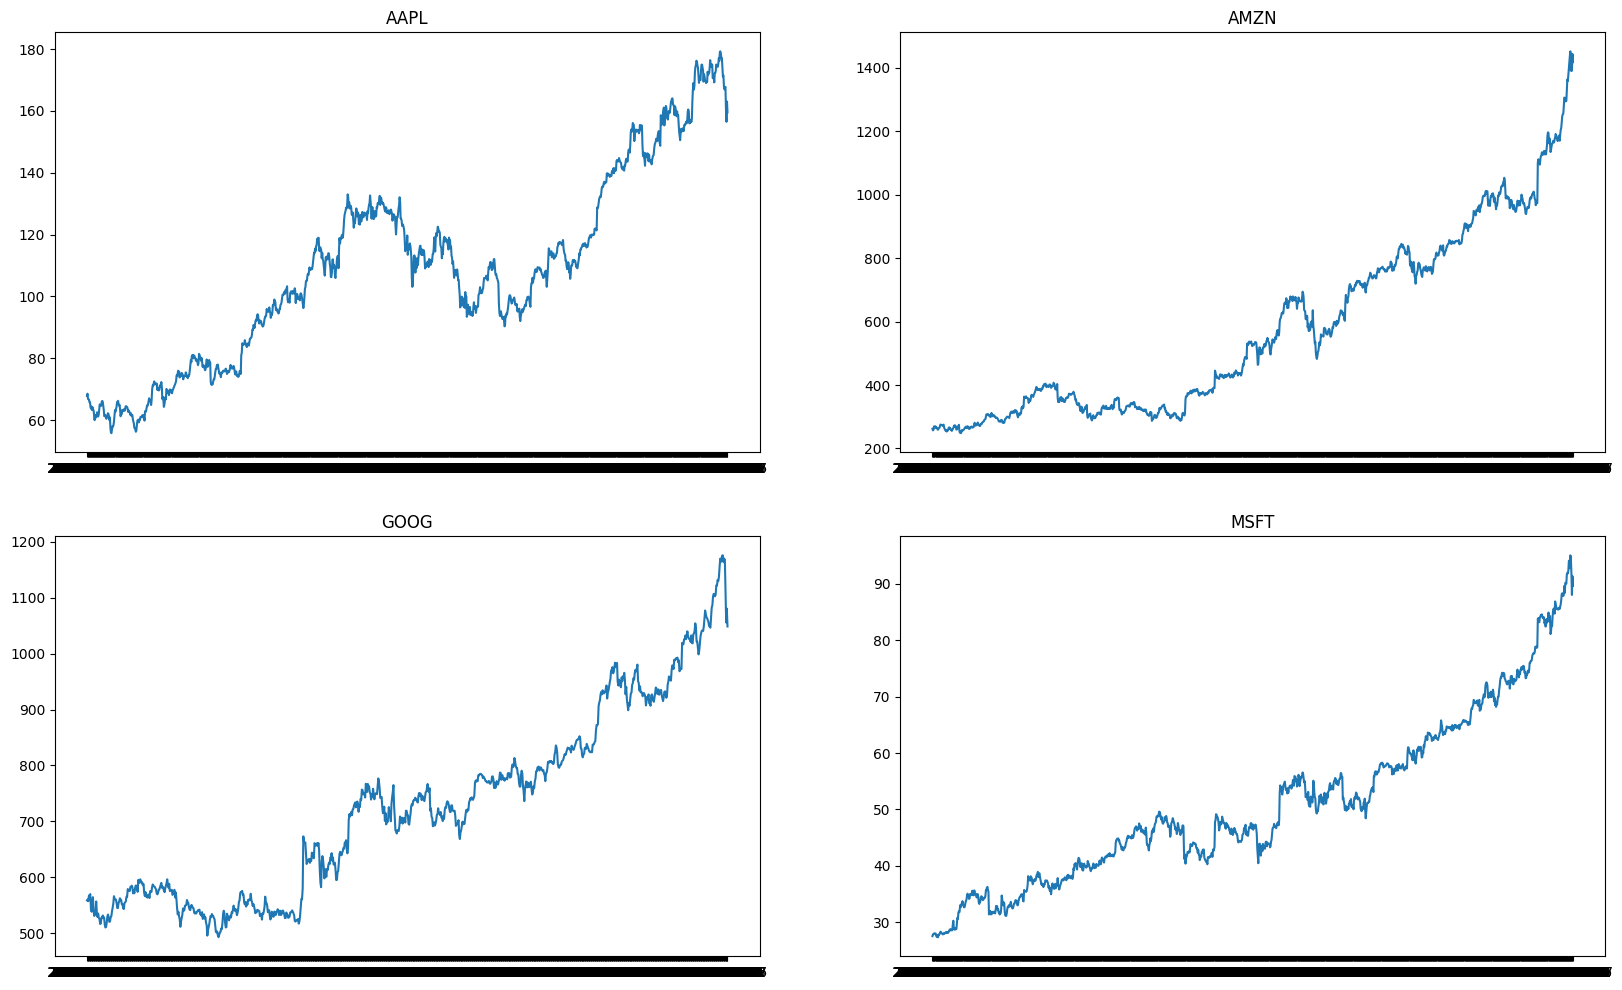

In [108]:
plt.figure(figsize = (20,12))
for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

In [109]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [110]:
all_data['close'].rolling(window = 10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [111]:
new_data = all_data.copy()

In [112]:
ma_day = [10, 20, 50]
for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [113]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [114]:
new_data.set_index('date', inplace = True)

In [115]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684


In [116]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

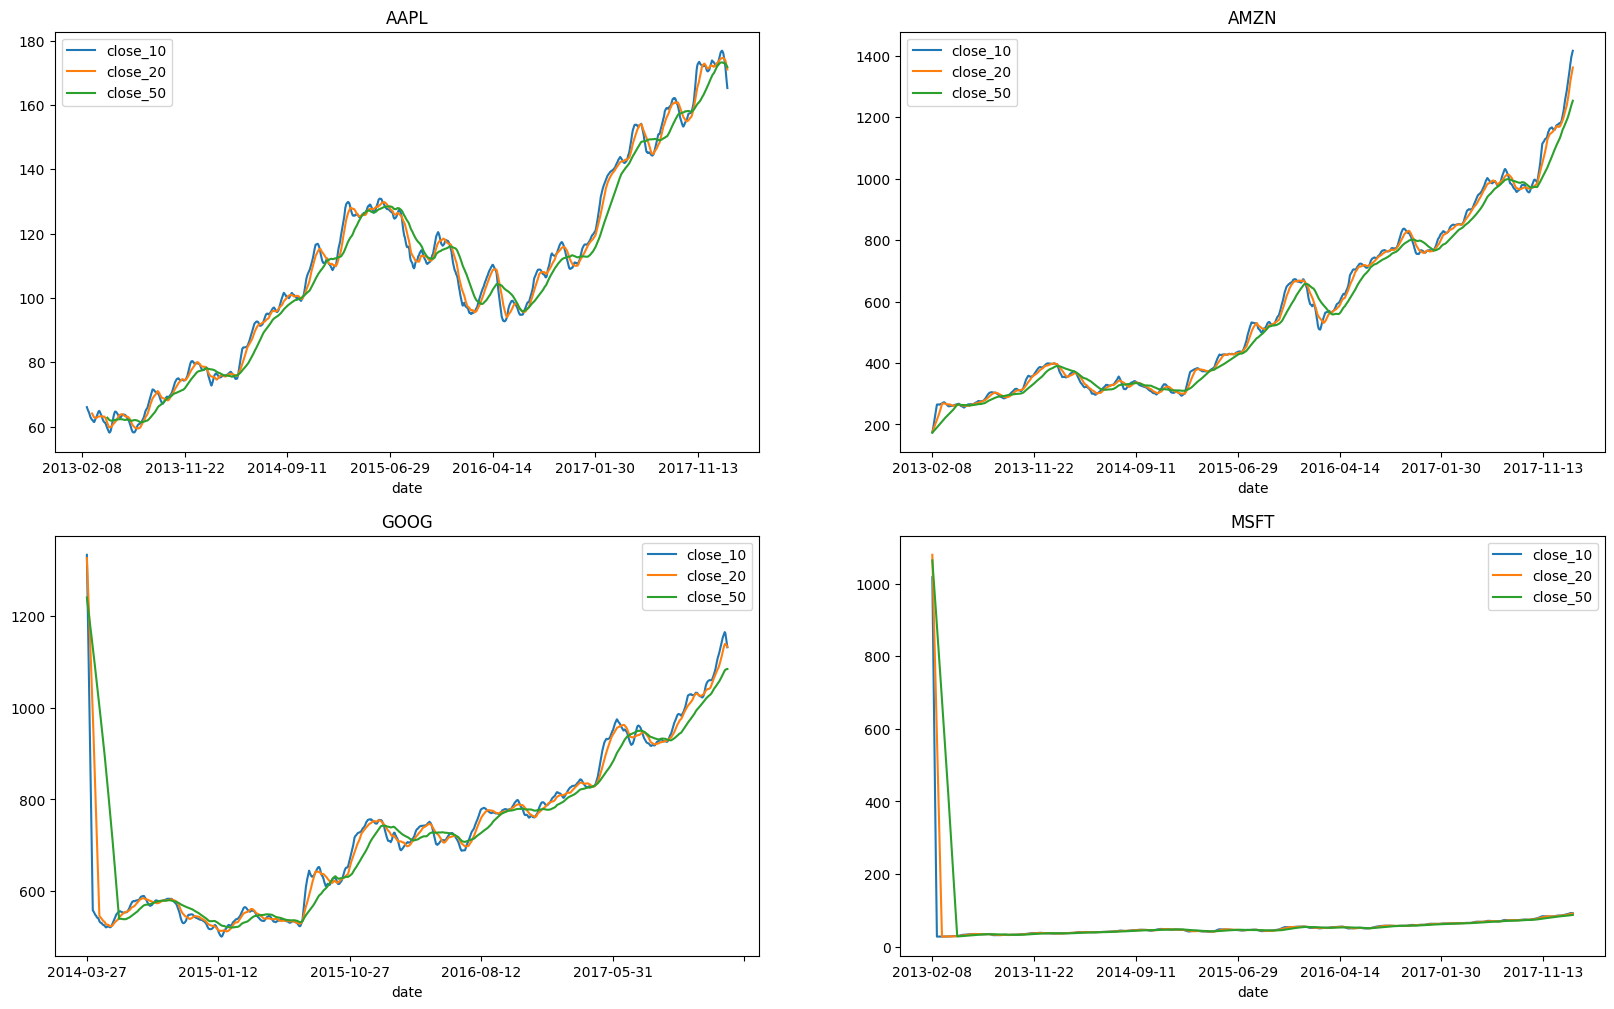

In [117]:
plt.figure(figsize = (20,12))
for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)

# Resampling

In [118]:
company_list

['C:\\\\Users\\\\Ikenna George\\\\Backup\\\\Documents\\\\DATA SCIENCE & PROGRAMMING\\\\DATA ANALYTICS PROJECTS\\\\Project 2; Time Series Project\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Ikenna George\\\\Backup\\\\Documents\\\\DATA SCIENCE & PROGRAMMING\\\\DATA ANALYTICS PROJECTS\\\\Project 2; Time Series Project\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Ikenna George\\\\Backup\\\\Documents\\\\DATA SCIENCE & PROGRAMMING\\\\DATA ANALYTICS PROJECTS\\\\Project 2; Time Series Project\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\Ikenna George\\\\Backup\\\\Documents\\\\DATA SCIENCE & PROGRAMMING\\\\DATA ANALYTICS PROJECTS\\\\Project 2; Time Series Project\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [119]:
apple = pd.read_csv(r'C:\\\\Users\\\\Ikenna George\\\\Backup\\\\Documents\\\\DATA SCIENCE & PROGRAMMING\\\\DATA ANALYTICS PROJECTS\\\\Project 2; Time Series Project\\\\individual_stocks_5yr\\\\AAPL_data.csv')

In [120]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [121]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [122]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [123]:
apple['Daily returns (in %)'] = apple['close'].pct_change() * 100 
apple.head()

,date,open,high,low,close,volume,Name,Daily returns (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [124]:
import plotly.express as px

In [125]:
px.line(apple, x = 'date', y = 'Daily returns (in %)')

In [126]:
apple.dtypes

date                     object
open                    float64
high                    float64
low                     float64
close                   float64
volume                    int64
Name                     object
Daily returns (in %)    float64
dtype: object

In [129]:
apple['date'] = pd.to_datetime(apple['date'])

In [130]:
apple.dtypes

date                    datetime64[ns]
open                           float64
high                           float64
low                            float64
close                          float64
volume                           int64
Name                            object
Daily returns (in %)           float64
dtype: object

In [131]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily returns (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [132]:
apple.set_index('date', inplace = True)

In [133]:
apple.head()

,open,high,low,close,volume,Name,Daily returns (in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


<Axes: xlabel='date'>

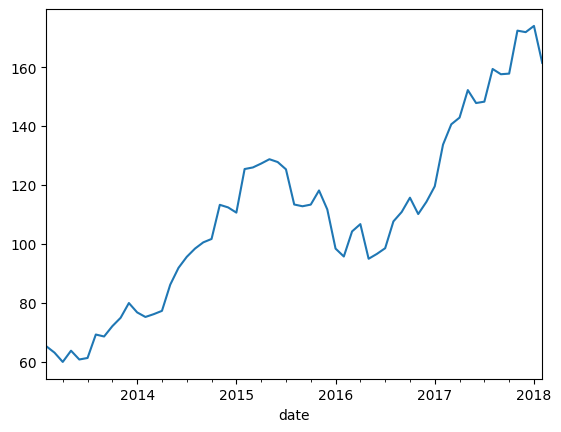

In [134]:
apple['close'].resample('M').mean().plot()

In [136]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: YE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

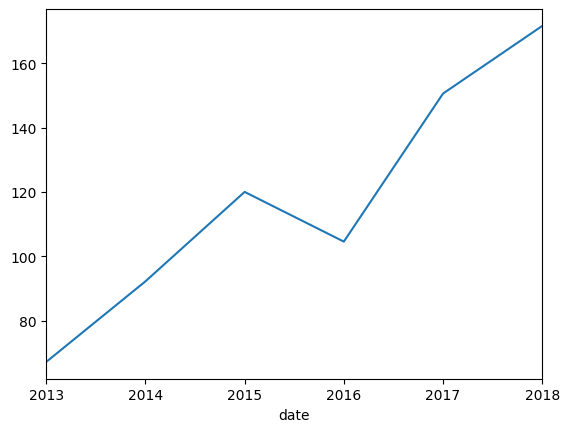

In [137]:
apple['close'].resample('Y').mean().plot()

In [138]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

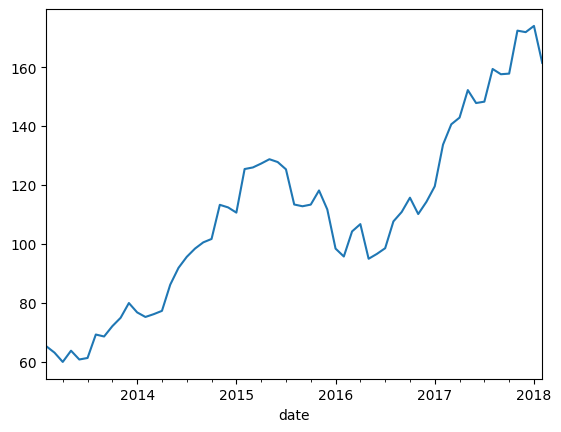

In [139]:
apple['close'].resample('M').mean().plot()

In [140]:
company_list

['C:\\\\Users\\\\Ikenna George\\\\Backup\\\\Documents\\\\DATA SCIENCE & PROGRAMMING\\\\DATA ANALYTICS PROJECTS\\\\Project 2; Time Series Project\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Ikenna George\\\\Backup\\\\Documents\\\\DATA SCIENCE & PROGRAMMING\\\\DATA ANALYTICS PROJECTS\\\\Project 2; Time Series Project\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Ikenna George\\\\Backup\\\\Documents\\\\DATA SCIENCE & PROGRAMMING\\\\DATA ANALYTICS PROJECTS\\\\Project 2; Time Series Project\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\Ikenna George\\\\Backup\\\\Documents\\\\DATA SCIENCE & PROGRAMMING\\\\DATA ANALYTICS PROJECTS\\\\Project 2; Time Series Project\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [141]:
company_list[0]

'C:\\\\Users\\\\Ikenna George\\\\Backup\\\\Documents\\\\DATA SCIENCE & PROGRAMMING\\\\DATA ANALYTICS PROJECTS\\\\Project 2; Time Series Project\\\\individual_stocks_5yr\\\\AAPL_data.csv'

In [142]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
goog = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [143]:
closing_price = pd.DataFrame()

In [144]:
app['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [146]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = goog['close']
closing_price['msft_close'] = msft['close']

In [147]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


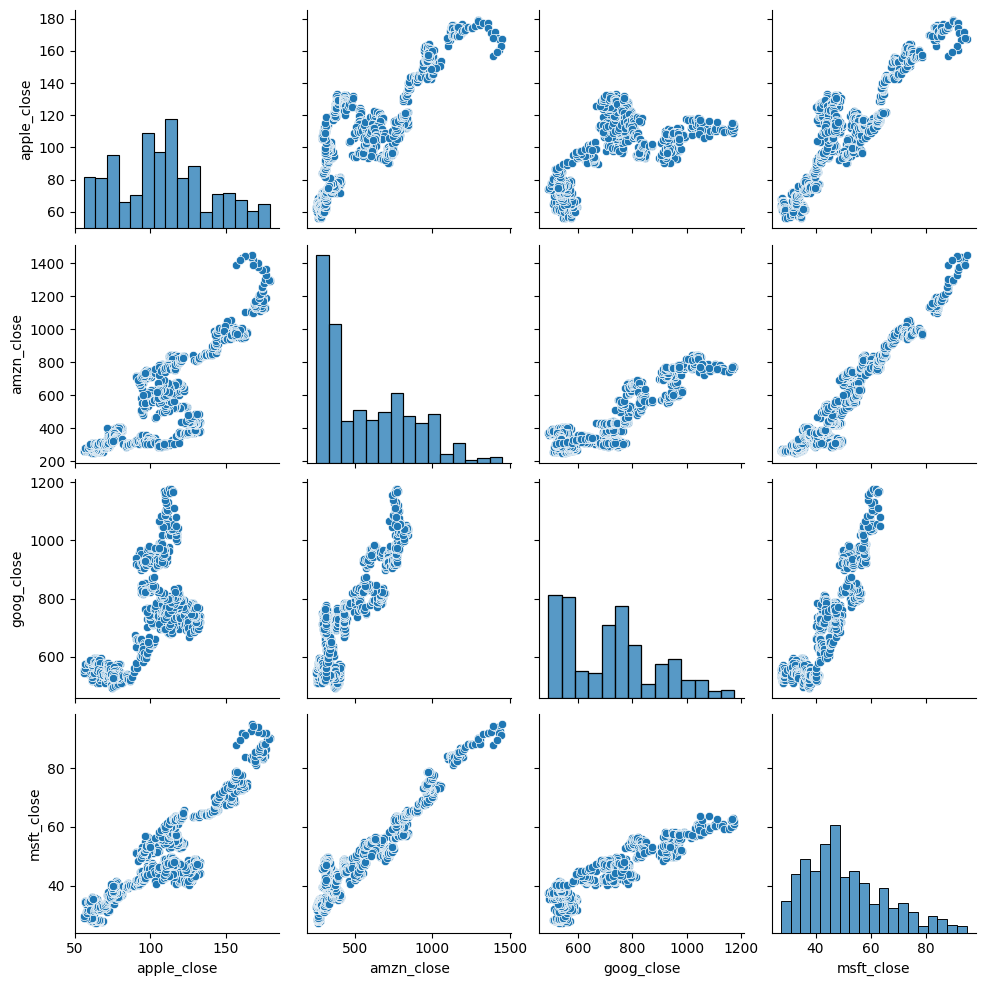

In [148]:
sns.pairplot(closing_price)

In [150]:
closing_price.corr()

,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
goog_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

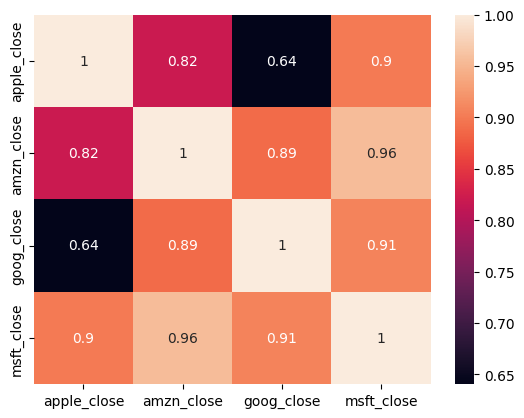

In [151]:
sns.heatmap(closing_price.corr(), annot = True)

# Performing Correlation Analysis

In [152]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [153]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [156]:
((closing_price['apple_close'] - closing_price['apple_close'].shift(1))/ closing_price['apple_close'].shift(1)) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [158]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = ((closing_price[col] - closing_price['apple_close'].shift(1))/ closing_price['apple_close'].shift(1)) * 100

In [159]:
closing_price

,apple_close,amzn_close,goog_close,msft_close,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,279.062755,725.284212,-58.941377
2,66.8428,258.70,556.97,27.88,-2.506658,277.326017,712.366725,-59.335720
3,66.7156,269.47,567.16,28.03,-0.190297,303.139904,748.498268,-58.065790
4,66.6556,269.24,567.00,28.04,-0.089934,303.563784,749.876191,-57.970849
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,730.197695,NaN,-43.701846
1255,160.5000,1429.95,NaN,91.78,-4.339015,752.276791,NaN,-45.297413
1256,156.4900,1390.00,NaN,88.00,-2.498442,766.043614,NaN,-45.171340
1257,163.0300,1442.84,NaN,91.33,4.179181,822.001406,NaN,-41.638443


In [160]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [161]:
closing_p = closing_price [['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

In [162]:
closing_p

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,279.062755,725.284212,-58.941377
2,-2.506658,277.326017,712.366725,-59.335720
3,-0.190297,303.139904,748.498268,-58.065790
4,-0.089934,303.563784,749.876191,-57.970849
...,...,...,...,...
1254,0.209043,730.197695,NaN,-43.701846
1255,-4.339015,752.276791,NaN,-45.297413
1256,-2.498442,766.043614,NaN,-45.171340
1257,4.179181,822.001406,NaN,-41.638443


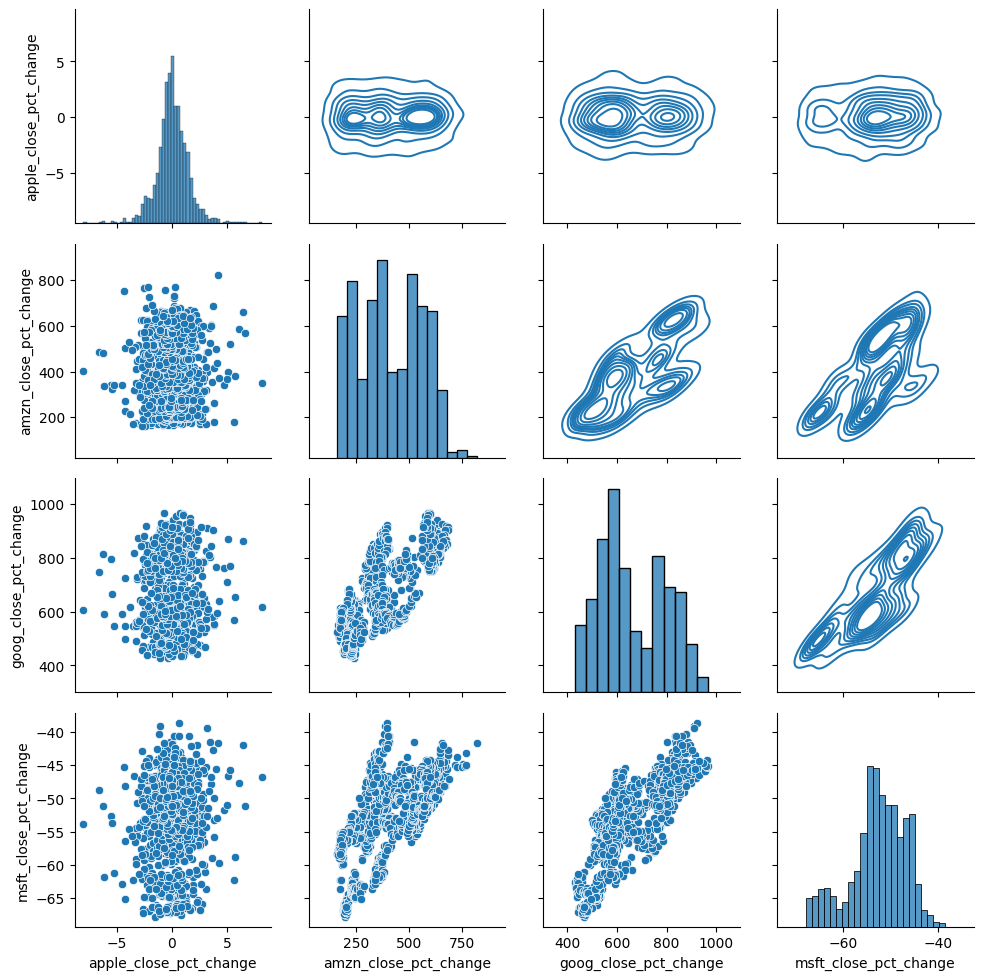

In [166]:
g = sns.PairGrid(data = closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [167]:
closing_p.corr()

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.014990,0.035607,0.083517
amzn_close_pct_change,0.014990,1.000000,0.746066,0.646578
goog_close_pct_change,0.035607,0.746066,1.000000,0.813807
msft_close_pct_change,0.083517,0.646578,0.813807,1.000000
